In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
rta=pd.read_csv('https://raw.githubusercontent.com/meitalhp/DataSet_project/main/RTA%20Dataset.csv')

## lets break the mith around girls and boys: who is the best driver?
###### סקר גוגל

In [39]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

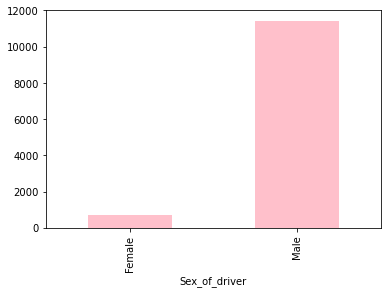

In [4]:
sex_of_driver=rta.groupby('Sex_of_driver').size()
sex_of_driver=sex_of_driver.drop('Unknown')
sex_of_driver.plot.bar(color='pink')

##### we did it! there are much more men involved in car accidents the women!
###### הסתייגות: נראה לנו מוזר שההפרש הוא מאוד דרסטי. לפי דעתינו, יכול להיות שיש בהכרח יותר גברים על הכביש מאשר נשים. אבל מהסתכלות קצרה, ראינו שגם   בישראל, יש יותר ת.ד עם גברים מאשר עם נשים
###### קישור-https://www.ynet.co.il/articles/0,7340,L-5148649,00.html 

women vs. men in Israel:

![alt text](image.JPG "women vs. men in Israel")

## let's check which hour is the most dangerous one (; 

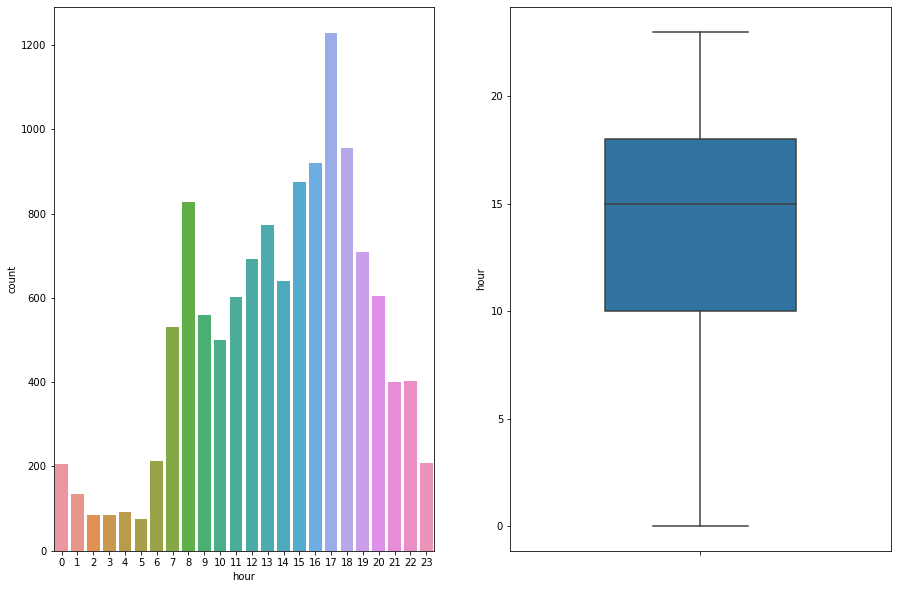

In [11]:
from datetime import date
fig, axes = plt.subplots(figsize=(15,10), ncols=2)
rta['hour']=pd.to_datetime(rta.Time)
rta['hour']=pd.DatetimeIndex(rta.hour).hour
sns.countplot(rta['hour'], ax=axes[0])
sns.boxplot(rta['hour'], ax=axes[1],orient="v",width=0.5)

##### ניתן לראות שהשעות המסוכנות הן בין 15:00-18:00
###### על ידי פיזור של בוקספלוט לא ניתן לראות בצורה מיטבית את השעה המקסימלית 
###### לכן הוספנו גם ספירה של הדאטה על מנת לראות בצורה ויזואלית מתי יש את הכי הרבה ת.ד= בשעה 17.
###### תובנה- השעה הכי מסוכנת היא דווקא בשעות העומס 
###### הצעה- כדאי למקד את האכיפה לשעות העומס על מנת להפחית ת.ד

###### meskel square in adia ababa - no cops, no lights, no traffic lights , no road markings or signs.

![alt text](meskel_square.JPG "meskel square")

###### נבדוק  עכשיו את הקשר בין רמת השכלה לסיכוי לבצע תאונת דרכים

In [19]:
pd.DataFrame(rta['Educational_level'].value_counts())

,Educational_level
Junior high school,7619
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


In [20]:
key=pd.DataFrame(rta['Accident_severity'].value_counts())
rta['Accident_severity_cat'] = rta['Accident_severity'].astype('category').cat.codes
x=pd.DataFrame(rta['Accident_severity_cat'].value_counts())
key['category']=x.index
key

,Accident_severity,category
Slight Injury,10415,2
Serious Injury,1743,1
Fatal injury,158,0


In [21]:
rta_new=rta.loc[(rta.Educational_level  == 'Junior high school')|(rta.Educational_level == 'Elementary school')|(rta.Educational_level == 'High school')|(rta.Educational_level == 'Above high school')|(rta.Educational_level =='Writing & reading')].copy()

In [22]:
features=['Accident_severity_cat','Number_of_casualties','Educational_level']
rta_new=pd.get_dummies(rta_new[features])
rta_new

,Accident_severity_cat,Number_of_casualties,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,Educational_level_Junior high school,Educational_level_Writing & reading
0,2,2,1,0,0,0,0
1,2,2,0,0,0,1,0
2,1,2,0,0,0,1,0
3,2,2,0,0,0,1,0
4,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...
12309,2,2,0,1,0,0,0
12312,2,1,0,1,0,0,0
12313,1,1,0,0,0,1,0
12314,2,1,0,0,0,1,0


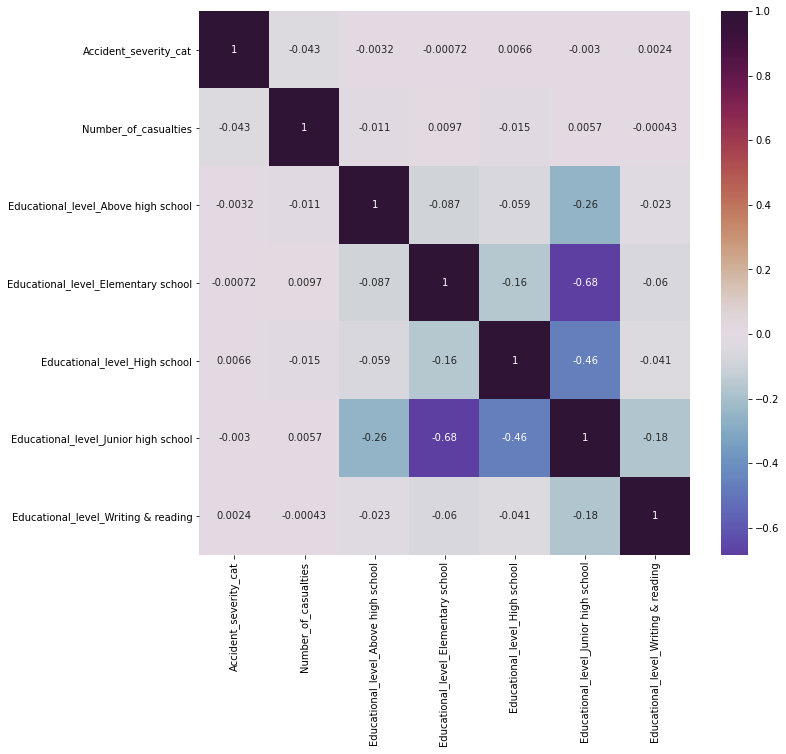

In [24]:
corrs = rta_new.corr()
plt.figure(figsize=(11,10))
sns.heatmap(corrs, cmap='twilight_shifted', center=0, annot = True);

מצאנו שהקורולציה מאוד חלשה בין רמת השכלה לבין חומרת התאונה. מכאן שככל הנראה אין קשר בין חומרת התאונה לבין רמת השכלה

נבדוק את סוגי ת.ד שקורות באדיס:

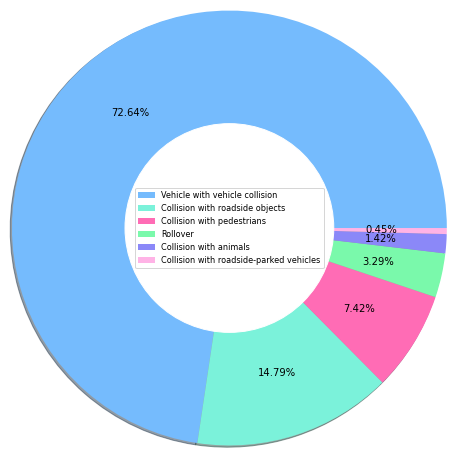

In [25]:
collision=rta['Type_of_collision'].value_counts()
typecoll=list(collision.index.values)
valuecoll=list(collision.to_numpy())
colors =['#75bbfd','#7bf2da','#ff6cb5','#7af9ab', '#8b88f8','#ffb3e6','#42b395','#aefd6c']
plt.pie(valuecoll[0:6],autopct='%1.2f%%',pctdistance=0.7, shadow=True, radius=2.5, colors=colors)
cir=plt.Circle((0,0),1.2,color='white')
plt.gca().add_artist(cir)
plt.legend(typecoll, loc='center', prop={'size':8.1},fancybox=True)
plt.show()

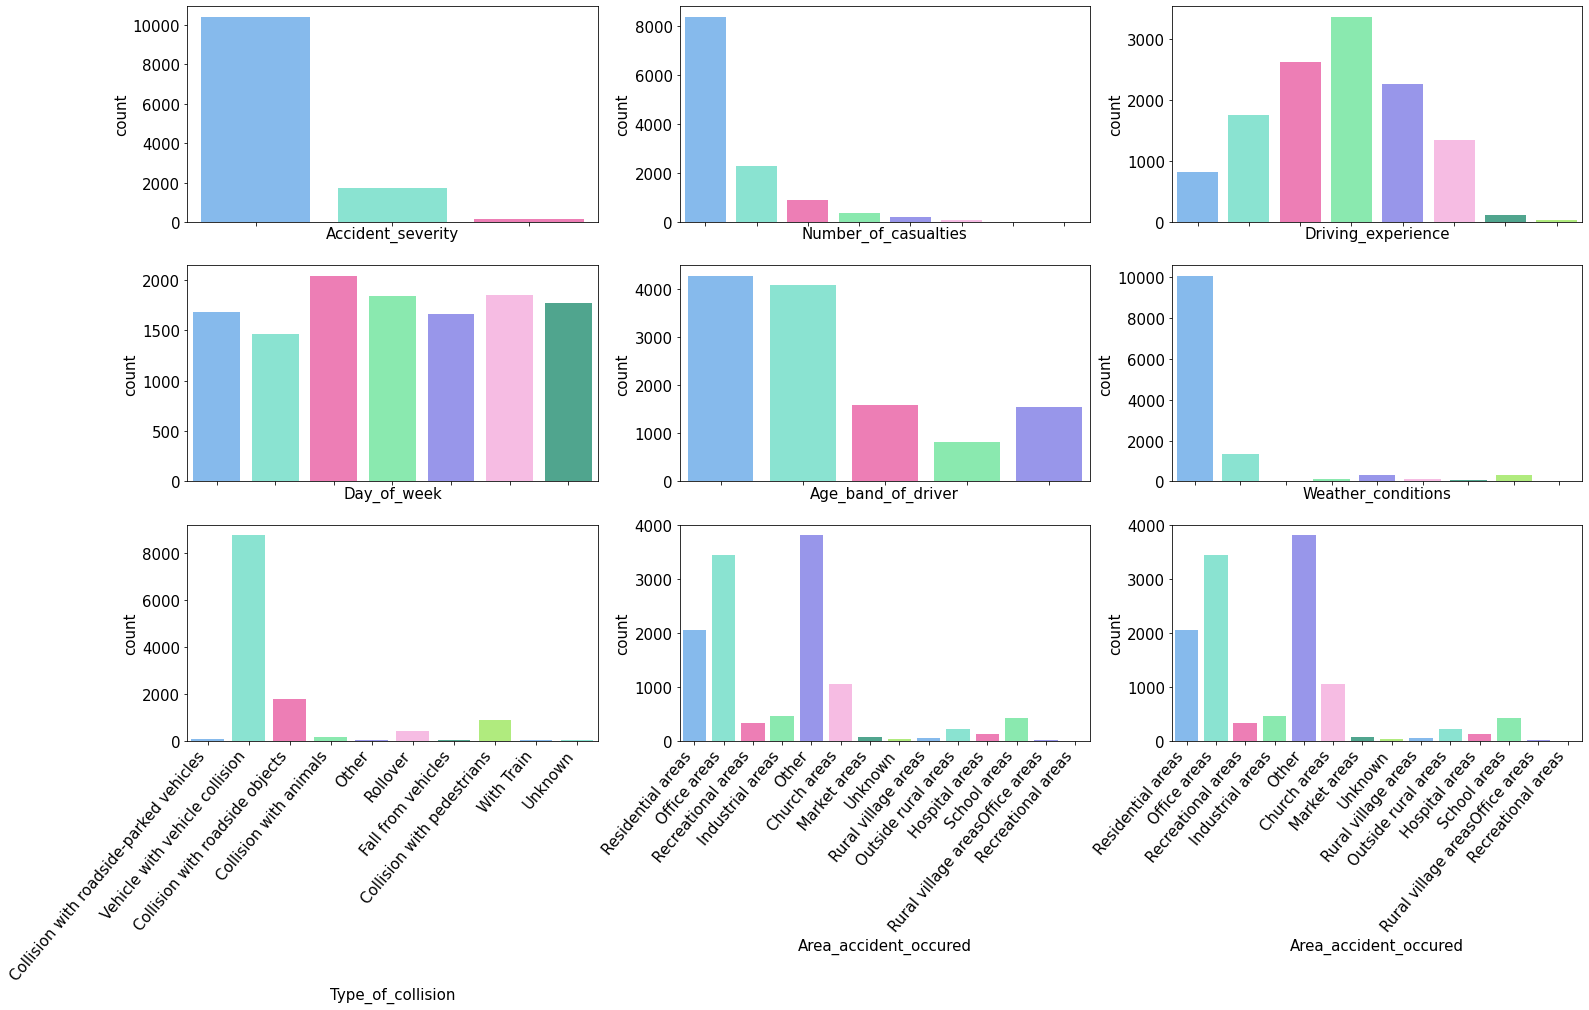

In [77]:
fig, axes = plt.subplots(figsize=(25,15), ncols=3, nrows=3)
fig.autofmt_xdate(rotation=50)
sns.countplot(ax=axes[(0,0)], x="Accident_severity", data=rta, palette=colors)
sns.countplot(ax=axes[(0,1)], x="Number_of_casualties", data=rta, palette=colors)
sns.countplot(ax=axes[(0,2)], x="Driving_experience", data=rta,palette=colors)
sns.countplot(ax=axes[(1,0)], x="Day_of_week", data=rta,palette=colors)
sns.countplot(ax=axes[(1,1)], x="Age_band_of_driver", data=rta,palette=colors)
sns.countplot(ax=axes[(1,2)], x="Weather_conditions", data=rta,palette=colors)
sns.countplot(ax=axes[(2,0)], x="Type_of_collision", data=rta,palette=colors)
sns.countplot(ax=axes[(2,1)], x="Area_accident_occured", data=rta,palette=colors)
sns.countplot(ax=axes[(2,2)], x="Area_accident_occured", data=rta,palette=colors)
plt.rcParams["font.size"] = "15"
plt.show()

#### ניתן לראות בגרף של שנות נסיון, שדווקא קרו יותר ת.ד למי שיש מעל ל5 שנים של נסיון על הכביש מאשר למי שכמעט ואין נסיון כלל
#### כנראה שיש עניין שלאחר כמות שנים מסוימת מתחילים להתנהג בצורה לא זהירה על הכביש- ככהל הנראה מקבלים ביטחון עצמי גבוה מידי ואולי אפילו עניין של אוטומטיות בנהיגה.
#### זה יכול להסביר למה בישראל(למשל) מבצעים רענון נהיגה לאחר 5 שנים על הכביש


##### ניתן בנוסף לראות שטווח הגילאים שמבצע הכי הרבה ת.ד הוא בין 18-30 אבל בפער קטן מאוד אחריו רואים את טווח הגיאלים הבא- 30-50. אפשר להסיק מזה שאולי הטענה שצעירים עושים יותר ת.ד היא לא כזאת נכונה באתיופיה. 

![alt text](accident_by_age.jpeg "accident by age")